In [116]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Bootstrap

In [117]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array you just created (this is "data_mean" that is returned by the function)
# 3. Using Numpy, calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a given CI using the array of means you created in point 3 (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_Mean(x, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
    sample = np.random.choice(x, (n_bootstraps, sample_size))
    data_mean = np.mean(sample)
    bootstrap_mean = np.mean(sample, axis = 1)
    
    lower1 = (100-ci)/2
    upper1 = 100-lower1
    
    lower = np.percentile(bootstrap_mean,lower1)
    upper = np.percentile(bootstrap_mean,upper1)
    
    return data_mean, lower, upper

In [118]:
# Load the data for testing the bootstrap function
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888-2023/main/lab2-statistics/customers.csv')
# df = pd.read_csv('M:\customers.csv')
data = df.values.T[1]  # we keep the second column and store it as a numpy array

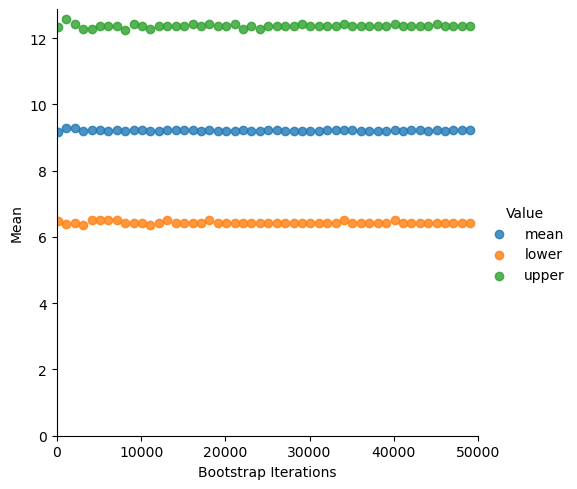

In [119]:
# Testing bootstrap function. Don't modify this code!
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_Mean(data, data.shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(x=df_boot.columns[0], y=df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

plt.show()

# If your function is correct, this plot should show three lines:
# the top one should be called 'upper' and have a value around 12
# the middle one should be called 'mean' and have a value around 9 (somewhere between 8-10)
# the bottom one should be called 'lower' and have a value around 6
# the three lines should be roughly parallel

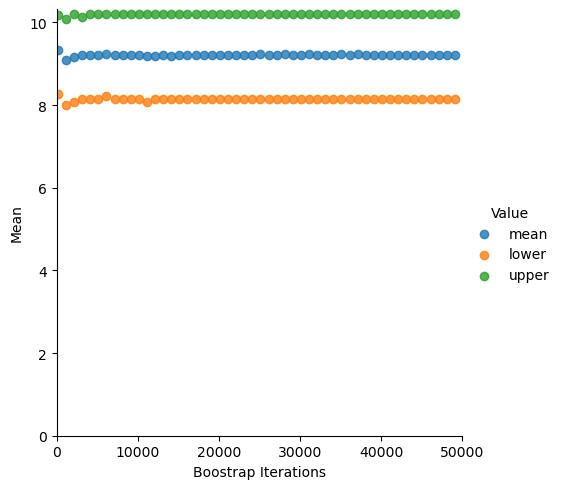

In [120]:
# Testing bootstrap function with different confidence interval. Don't modify this code!

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_Mean(data, data.shape[0], i, 50)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(x=df_boot.columns[0], y=df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

plt.show()

# If your function is correct, this plot should show three lines:
# the top one ('upper') should be around 10
# the middle one  ('mean') should be around 9
# the bottom one ('lower') should be around 8
# the three lines should be roughly parallel

# Permutation test

In [121]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permutation_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different and your code should be able to cope with that)
    n_permutations: number of permutations to calculate the p-value
    """
    # <---INSERT YOUR CODE HERE--->
    pvalue = []
    count = 0
    tobs = np.mean(sample2)-np.mean(sample1)
    concat = np.concatenate((sample1,sample2))
    for i in range(n_permutations):
        perm = np.random.permutation(concat)
        old = perm[:int(len(perm)/2)]
        new = perm[int(len(perm)/2):]
        if ((np.mean(new)-np.mean(old))>tobs):
            count += 1
    pvalue = count/n_permutations
    return pvalue

In [122]:
# Use your permutation_test function and the examples from the lecture to check that the function behaves as expected.
# You can copy and paste the data from the lecture notes here and test your function by checking that the p-values match those from the lecture.

# <---INSERT YOUR CODE HERE--->
v1 = [0,0,0,0,0,0,1,0,0,1,0]
v2 = [1,0,0,1,1,1,0,0,0,1,0]
pvalue=permutation_test(v1,v2,20000)
print(pvalue)

0.0322


## Quiz

Once you're sure that both functions are working as expected, go to the Moodle quiz. Add cells below for each exercise.

Note: To load the vehicles dataset check out this link: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")

In [123]:
def bootstrap_STD(x, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
    sample = np.random.choice(x, (n_bootstraps, sample_size))
    data_std = np.std(sample)
    bootstrap_std = np.std(sample, axis = 1)
    
    lower1 = (100-ci)/2
    upper1 = 100-lower1
    
    lower = np.percentile(bootstrap_std,lower1)
    upper = np.percentile(bootstrap_std,upper1)
    
    return data_std, lower, upper

### Customers data

In [124]:
# Load the data for testing the bootstrap function
df_custo = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888-2023/main/lab2-statistics/customers.csv')
# df = pd.read_csv('M:\customers.csv')
custo_data = df_custo.values.T[1]  # we keep the second column and store it as a numpy array

### Vehicles data

In [125]:
df_vehi = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888-2023/main/lab2-statistics/vehicles.csv')
data_Oldvehi = df_vehi.values.T[0]
data = df_vehi.dropna()
data_Newvehi = data.values.T[1]  # we keep the second column and store it as a numpy array

##### Questions 2 and 3

In [126]:
mean,lower,upper = bootstrap_Mean(data_Newvehi,data_Newvehi.shape[0], 10000, 95)
print('For 95% CI: Mean {}, Lower: {}, Upper: {}'.format(round(mean,2),round(lower,2),round(upper,2)))
mean,lower,upper = bootstrap_Mean(data_Oldvehi,data_Oldvehi.shape[0], 10000, 80)
print('For 80% CI: Mean {}, Lower: {}, Upper: {}'.format(round(mean,2),round(lower,2),round(upper,2)))

For 95% CI: Mean 30.48, Lower: 29.15, Upper: 31.81
For 80% CI: Mean 20.14, Lower: 19.62, Upper: 20.65


##### Questions 4 and 5

In [127]:
std,lower,upper = bootstrap_STD(data_Newvehi, data_Newvehi.shape[0], 10000, 95)
print('For 95% CI: STD {}, Lower: {}, Upper: {}'.format(round(mean,2),round(lower,2),round(upper,2)))
std,lower,upper = bootstrap_STD(data_Newvehi, data_Newvehi.shape[0], 10000, 73)
print('For 73% CI: STD {}, Lower: {}, Upper: {}'.format(round(mean,2),round(lower,2),round(upper,2)))

For 95% CI: STD 20.14, Lower: 5.14, Upper: 6.91
For 73% CI: STD 20.14, Lower: 5.52, Upper: 6.52


##### Question 7

In [128]:
v1 = df_vehi.values.T[0]
v2 = df_vehi.values.T[1]
v2 = v2[~np.isnan(v2)]

In [129]:
pvalue=permutation_test(v1,v2,30000)
print(pvalue)

0.0


##### Question 8

In [130]:
df_voting = pd.read_csv('Book1.csv', header=None)

In [131]:
OH = df_voting.values.T[1]
dt = df_voting.dropna()
PA = dt.values.T[0]

In [132]:
mean,lower,upper = bootstrap_Mean(PA,PA.shape[0], 100000, 98)
print('For 98% CI: Mean {}, Lower: {}, Upper: {}'.format(round(mean,2),round(lower,2),round(upper,2)))
mean,lower,upper = bootstrap_Mean(OH,OH.shape[0], 100000, 98)
print('For 98% CI: Mean {}, Lower: {}, Upper: {}'.format(round(mean,2),round(lower,2),round(upper,2)))

For 98% CI: Mean 45.47, Lower: 42.81, Upper: 48.32
For 98% CI: Mean 44.32, Lower: 41.88, Upper: 46.74


In [133]:
v1 = df_voting.values.T[0]
v2 = df_voting.values.T[1]
v1 = v1[~np.isnan(v1)]
pvalue=permutation_test(v2,v1,30000)
print(pvalue)

0.2354


In [134]:
v2.size

88